/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 2s 7ms/step - loss: 1.1269 - acc: 0.3500 - val_loss: 1.0522 - val_acc: 0.4000
Epoch 2/20
240/240 [==============================] - 1s 6ms/step - loss: 1.1201 - acc: 0.4083 - val_loss: 1.0655 - val_acc: 0.3833
Epoch 3/20
240/240 [==============================] - 1s 6ms/step - loss: 1.0678 - acc: 0.4167 - val_loss: 1.0295 - val_acc: 0.4000
Epoch 4/20
240/240 [==============================] - 1s 6ms/step - loss: 1.0295 - acc: 0.5042 - val_loss: 1.0309 - val_acc: 0.4167
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.9753 - acc: 0.5917 - val_loss: 0.8660 - val_acc: 0.7333
Epoch 6/20
240/240 [==============================] - 1s 6ms/step - loss: 0.8527 - acc: 0.6583 - val_loss: 0.9087 - val_acc: 0.5667
Epoch 7/20
240/240 [==============================] - 1s 5ms/step - loss: 0.8575 - acc: 0.5667 - val_loss: 0.7471 - val_acc: 0.7333
Epoch 8/20
240/240 [===========

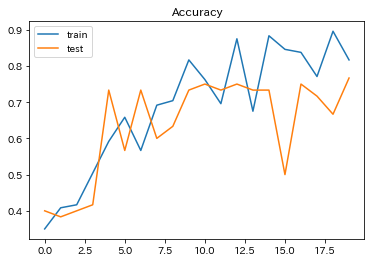

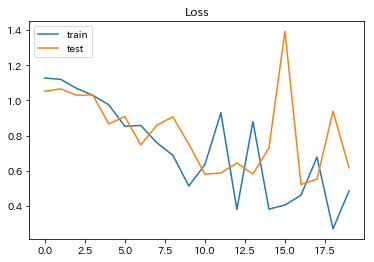

In [2]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデルを取得 --- (*6)
model = cnn_model.get_model(in_shape, nb_classes)

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*8)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*9)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model-light.hdf5')


In [86]:
x

array([[[[0.8509804 , 0.7058824 , 0.53333336],
         [0.84313726, 0.6901961 , 0.52156866],
         [0.84705883, 0.7019608 , 0.5294118 ],
         ...,
         [0.87058824, 0.7254902 , 0.54901963],
         [0.8745098 , 0.70980394, 0.5137255 ],
         [0.85490197, 0.69803923, 0.49411765]],

        [[0.8509804 , 0.7058824 , 0.5411765 ],
         [0.84705883, 0.69411767, 0.5254902 ],
         [0.84705883, 0.69411767, 0.5254902 ],
         ...,
         [0.84705883, 0.7019608 , 0.4862745 ],
         [0.8784314 , 0.7019608 , 0.44705883],
         [0.85882354, 0.6901961 , 0.48235294]],

        [[0.84313726, 0.6901961 , 0.52156866],
         [0.8509804 , 0.68235296, 0.5137255 ],
         [0.84313726, 0.6745098 , 0.49803922],
         ...,
         [0.87058824, 0.72156864, 0.5294118 ],
         [0.87058824, 0.72156864, 0.54509807],
         [0.85882354, 0.7137255 , 0.49803922]],

        ...,

        [[0.6901961 , 0.5686275 , 0.45490196],
         [0.7254902 , 0.59607846, 0.46666667]

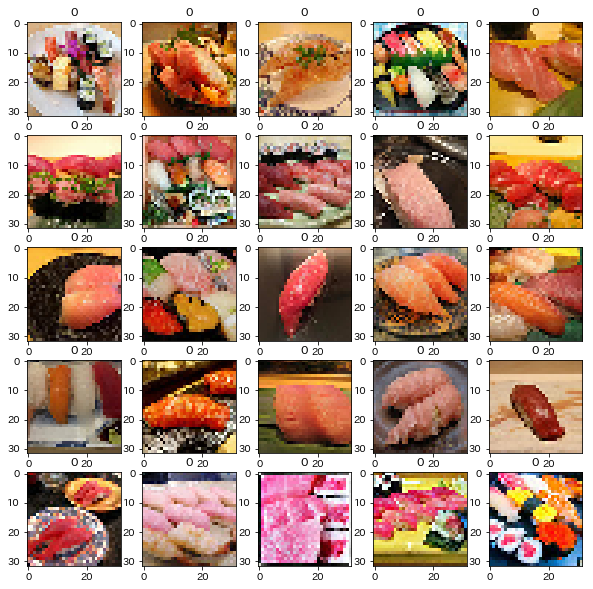

In [83]:
import matplotlib.pyplot as plt
# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']
# 開始インデックス --- (*1)
idx = 0
# pyplotで出力
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x[i + idx])
    plt.title(y[i + idx])
plt.show()

/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 2s 9ms/step - loss: 1.2520 - acc: 0.3708 - val_loss: 0.9819 - val_acc: 0.6500
Epoch 2/20
240/240 [==============================] - 1s 5ms/step - loss: 1.0474 - acc: 0.4917 - val_loss: 0.9428 - val_acc: 0.4833
Epoch 3/20
240/240 [==============================] - 1s 5ms/step - loss: 0.9831 - acc: 0.6125 - val_loss: 0.7474 - val_acc: 0.7667
Epoch 4/20
240/240 [==============================] - 1s 5ms/step - loss: 0.7474 - acc: 0.7375 - val_loss: 0.7624 - val_acc: 0.7167
Epoch 5/20
240/240 [==============================] - 1s 5ms/step - loss: 0.6101 - acc: 0.7833 - val_loss: 0.9760 - val_acc: 0.6167
Epoch 6/20
240/240 [==============================] - 1s 5ms/step - loss: 0.5361 - acc: 0.8208 - val_loss: 1.1480 - val_acc: 0.5667
Epoch 7/20
240/240 [==============================] - 1s 6ms/step - loss: 0.4796 - acc: 0.8042 - val_loss: 0.4027 - val_acc: 0.8167
Epoch 8/20
240/240 [===========

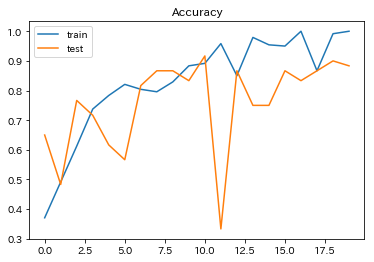

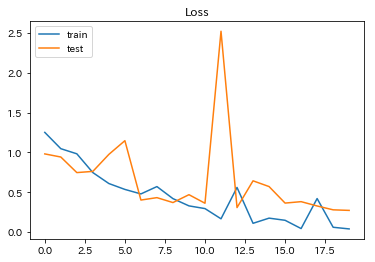

In [91]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 入力と出力を指定 --- (*1)
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み --- (*2)
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換 --- (*3)
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す --- (*4)
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける --- (*5)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


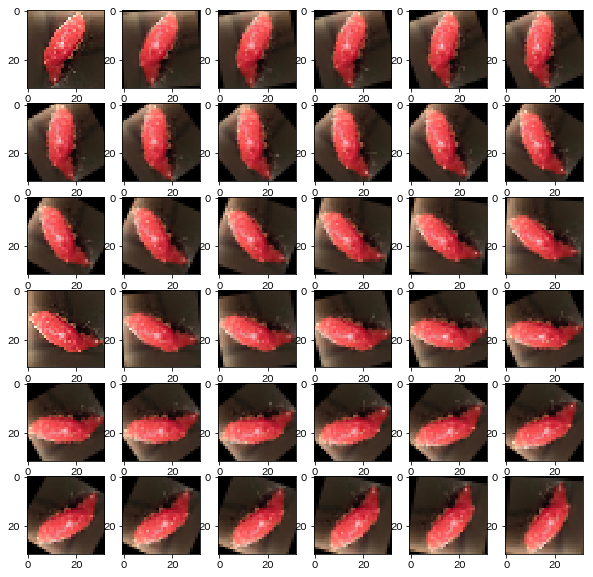

In [102]:
import matplotlib.pyplot as plt
import cv2

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
img = x[12] # 分かりやすい写真を選択

plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    center = (16, 16)
    angle = i * 5 # 角度を変えて出力
    scale = 1
    mtx = cv2.getRotationMatrix2D(center, angle, scale)
    img2 = cv2.warpAffine(img, mtx, (32, 32))
    plt.imshow(img2)
plt.show()


/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


水増し前= 240
水増し後= 5760
Train on 5760 samples, validate on 60 samples
Epoch 1/7
5760/5760 [==============================] - 29s 5ms/step - loss: 0.8565 - acc: 0.6351 - val_loss: 0.4858 - val_acc: 0.7500
Epoch 2/7
5760/5760 [==============================] - 28s 5ms/step - loss: 0.5161 - acc: 0.8134 - val_loss: 0.3478 - val_acc: 0.9167
Epoch 3/7
5760/5760 [==============================] - 28s 5ms/step - loss: 0.3202 - acc: 0.8866 - val_loss: 0.4137 - val_acc: 0.8667
Epoch 4/7
5760/5760 [==============================] - 32s 6ms/step - loss: 0.2446 - acc: 0.9161 - val_loss: 0.9948 - val_acc: 0.6333
Epoch 5/7
5760/5760 [==============================] - 34s 6ms/step - loss: 0.1967 - acc: 0.9398 - val_loss: 0.5384 - val_acc: 0.8833
Epoch 6/7
5760/5760 [==============================] - 31s 5ms/step - loss: 0.1624 - acc: 0.9545 - val_loss: 0.4564 - val_acc: 0.8667
Epoch 7/7
60/60 [==============================] - 0s 2ms/step
正解率= 0.850000011920929 loss= 0.7517443418502807


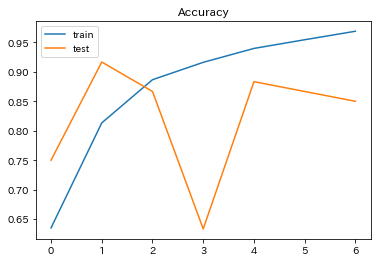

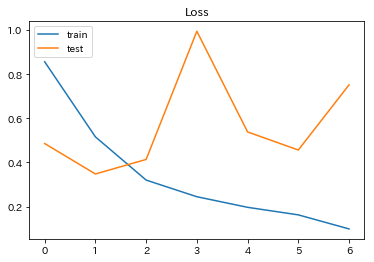

In [4]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2

# 入力と出力を指定
im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

# 写真データを読み込み
photos = np.load('image/photos.npz')
x = photos['x']
y = photos['y']

# 読み込んだデータをの三次元配列に変換
x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

# 学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

# 学習用データを水増しする --- (*1)
x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        # 回転させる --- (*2)
        center = (16, 16) # 回転の中心点
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)
        # さらに左右反転させる --- (*3)
        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)        
        
# 水増しした画像を学習用に置き換える
print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

# CNNモデル構造を定義 --- (*6)
model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*7)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*8)
hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# モデルを評価 --- (*9)
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*10)
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/photos-model.hdf5')


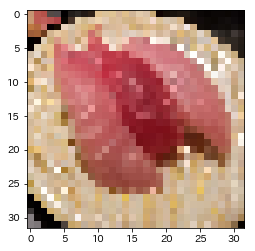

この写真は、 寿司 で、カロリーは 588 kcal
可能性は、 100 %


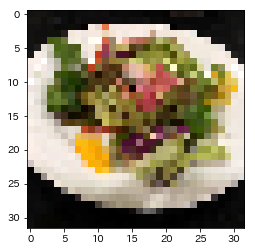

この写真は、 サラダ で、カロリーは 118 kcal
可能性は、 99 %


In [19]:
import cnn_model
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

target_image = "test-sushi.jpg"

im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ["寿司", "サラダ", "麻婆豆腐"]
CALORIES = [588, 118, 648]

# 保存したCNNモデルを読み込む
model = cnn_model.get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    # 答えを表示
    print("この写真は、", LABELS[idx], "で、カロリーは", CALORIES[idx],"kcal")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    check_photo_str('test-sushi.jpg')
    check_photo_str('test-salad.jpg')
